<a href="https://colab.research.google.com/github/varunSabnis/pytorch_course_udemy/blob/master/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [3]:
n_pts = 500
X,y = datasets.make_circles(n_samples = n_pts, noise = 0.1, random_state=123, factor = 0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y)
print(y_data)
print(x_data)

tensor([0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
        1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 

In [0]:
def scatter_plot():
  plt.title("Training Data")
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

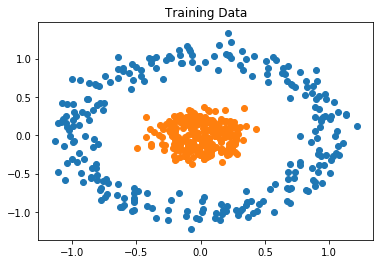

In [5]:
scatter_plot()

In [0]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_sizes, output_size):
    super().__init__()
    self.linears = nn.Sequential(nn.Linear(input_size, hidden_sizes[0])
                                    ,nn.ReLU()
                                    ,nn.Linear(hidden_sizes[0], output_size)
                                    ,nn.Sigmoid()
                                )

In [7]:
torch.manual_seed(2)
neural_network = NeuralNetwork(2,[4],1)
print(list(neural_network.parameters())) 

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(neural_network.parameters(), lr=0.03)

In [9]:
losses = []
epochs = 1000
for i in range(epochs):
  output = neural_network.linears.forward(x_data)
  loss = criterion(output, y_data)
  losses.append(loss.item())
  optimizer.zero_grad()
  print("loss {} in epoch {}".format(loss, i))
  loss.backward()
  optimizer.step()


  

loss 0.7069743275642395 in epoch 0
loss 0.7020567655563354 in epoch 1
loss 0.6976773142814636 in epoch 2
loss 0.6936500072479248 in epoch 3
loss 0.6898942589759827 in epoch 4
loss 0.6862637400627136 in epoch 5
loss 0.6828327775001526 in epoch 6
loss 0.6795967817306519 in epoch 7
loss 0.67654949426651 in epoch 8
loss 0.6734821796417236 in epoch 9
loss 0.6702199578285217 in epoch 10
loss 0.6667486429214478 in epoch 11
loss 0.6629865169525146 in epoch 12
loss 0.6588770747184753 in epoch 13
loss 0.6542617082595825 in epoch 14
loss 0.6491332054138184 in epoch 15
loss 0.6435064077377319 in epoch 16
loss 0.6374351382255554 in epoch 17
loss 0.6309623122215271 in epoch 18
loss 0.6243532299995422 in epoch 19
loss 0.6177070736885071 in epoch 20
loss 0.6111494898796082 in epoch 21
loss 0.6045832633972168 in epoch 22
loss 0.5978541970252991 in epoch 23
loss 0.5909200310707092 in epoch 24
loss 0.583808958530426 in epoch 25
loss 0.5766171216964722 in epoch 26
loss 0.5694156885147095 in epoch 27
loss 

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


loss 0.034299153834581375 in epoch 159
loss 0.033855561167001724 in epoch 160
loss 0.0334237664937973 in epoch 161
loss 0.03300123289227486 in epoch 162
loss 0.03258765861392021 in epoch 163
loss 0.03218402341008186 in epoch 164
loss 0.0317908450961113 in epoch 165
loss 0.03140769898891449 in epoch 166
loss 0.031034428626298904 in epoch 167
loss 0.030671296641230583 in epoch 168
loss 0.03031703643500805 in epoch 169
loss 0.02997206151485443 in epoch 170
loss 0.02963482029736042 in epoch 171
loss 0.02930484339594841 in epoch 172
loss 0.028982607647776604 in epoch 173
loss 0.028666701167821884 in epoch 174
loss 0.02835797145962715 in epoch 175
loss 0.028055427595973015 in epoch 176
loss 0.027759462594985962 in epoch 177
loss 0.02747003734111786 in epoch 178
loss 0.02718680538237095 in epoch 179
loss 0.02690943330526352 in epoch 180
loss 0.02663779817521572 in epoch 181
loss 0.02637195959687233 in epoch 182
loss 0.026111699640750885 in epoch 183
loss 0.02585684508085251 in epoch 184
loss 

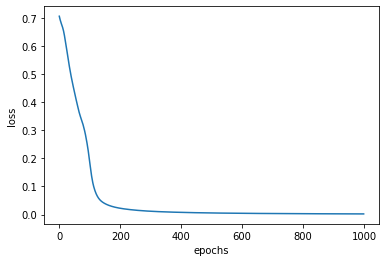

In [10]:
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(range(epochs), losses)

In [0]:
def plot_desicion_boundary(X, y):
  x_span = np.linspace(min(X[ : ,0]), max(X[:,0]))
  y_span = np.linspace(min(X[:, 1]), max(X[ :, 1]))
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_res = neural_network.linears.forward(grid)
  z = pred_res.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

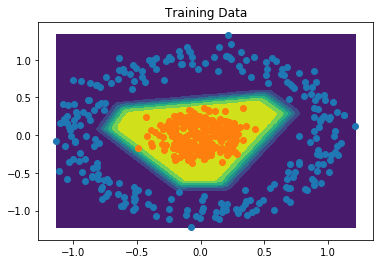

In [12]:
plot_desicion_boundary(X, y)
scatter_plot()

Prediction for the point red is tensor([0.8999], grad_fn=<SigmoidBackward>)


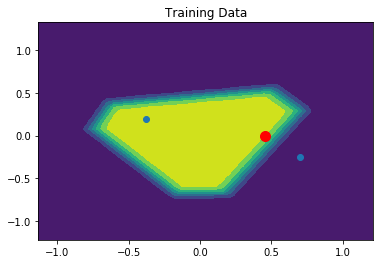

In [14]:
x = 0.4525
y = 0.0
point = torch.Tensor([x, y])
prediction = neural_network.linears.forward(point)
plt.plot(x, y, marker='o', markersize=10, color='red')
print("Prediction for the point red is {}".format(prediction))
plot_desicion_boundary(X, y)
scatter_plot()